# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [112]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


## Visualize Dataset
This is the same code from Assignment 1

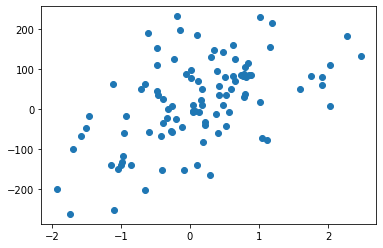

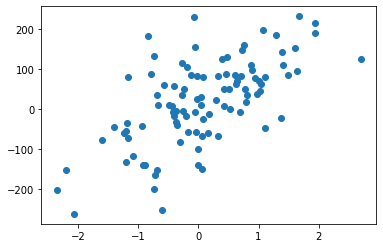

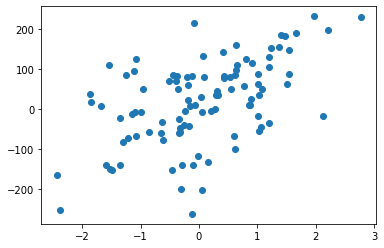

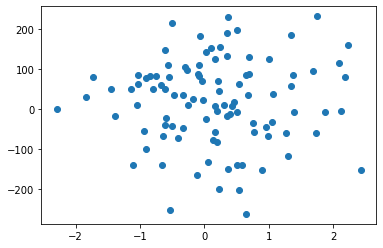

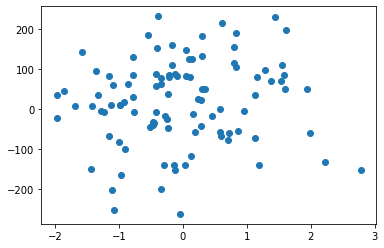

In [113]:
import matplotlib.pyplot as plt
for i in range(0,5):
   plt.scatter(X[:,i],y)
   plt.show()

# Your code here

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [114]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

normalizer = tf.keras.layers.Normalization(axis=-1)

model = tf.keras.Sequential([
        normalizer,
        layers.Dense(5, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(1),
    ])

In [115]:
model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.0001,momentum=0.0,nesterov=False),
    loss=tf.keras.losses.MeanSquaredError())

In [116]:
model.predict(X_train[:10])

array([[ 0.268295  ],
       [ 0.40692922],
       [ 0.2321752 ],
       [ 0.8441841 ],
       [-0.12037146],
       [-0.0083224 ],
       [ 0.2598156 ],
       [ 0.29622173],
       [ 0.15230583],
       [ 0.13317993]], dtype=float32)

In [117]:
model.layers[1].kernel

<tf.Variable 'dense_31/kernel:0' shape=(5, 5) dtype=float32, numpy=
array([[ 0.65486336,  0.39331222,  0.38320518, -0.22618932, -0.4827672 ],
       [-0.74805623, -0.7369325 , -0.13878387,  0.46927977, -0.11308515],
       [ 0.41614163, -0.25180066, -0.3849027 ,  0.19859743, -0.17411983],
       [-0.70291847,  0.6826385 ,  0.11948186, -0.24193072,  0.6285566 ],
       [ 0.31151545, -0.05108535,  0.5890639 ,  0.3257202 ,  0.4203304 ]],
      dtype=float32)>

In [118]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normalizat  (None, 5)                11        
 ion)                                                            
                                                                 
 dense_31 (Dense)            (None, 5)                 30        
                                                                 
 dense_32 (Dense)            (None, 5)                 30        
                                                                 
 dense_33 (Dense)            (None, 1)                 6         
                                                                 
Total params: 77
Trainable params: 66
Non-trainable params: 11
_________________________________________________________________


In [119]:
%%time
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=1000)

CPU times: user 28.6 s, sys: 1.13 s, total: 29.7 s
Wall time: 28.2 s


## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

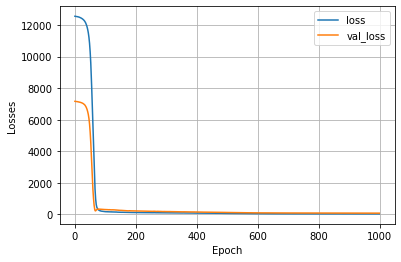

In [120]:
# Your code here
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
##plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend()
plt.grid(True)

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [121]:
predictions = model.predict(X_test)

In [122]:
# Insert the function for R2 Score
from sklearn.metrics import r2_score

print(r2_score(y_test,predictions))

0.9959940574455577


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

Your text here

In [123]:
# Your code here
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=10000, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [124]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

normalizer = tf.keras.layers.Normalization(axis=-1)

model = tf.keras.Sequential([
        normalizer,
        layers.Dense(5, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(1),
    ])

In [125]:
model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.0001,momentum=0.0,nesterov=False),
    loss=tf.keras.losses.MeanSquaredError())

In [126]:
model.predict(X_train[:10])

array([[-0.0412894 ],
       [-0.9511272 ],
       [-0.21065173],
       [-0.28830853],
       [ 0.        ],
       [-0.56357175],
       [-0.867015  ],
       [-1.0963545 ],
       [-0.20718148],
       [-0.064897  ]], dtype=float32)

In [127]:
model.layers[1].kernel

<tf.Variable 'dense_34/kernel:0' shape=(5, 5) dtype=float32, numpy=
array([[-0.4303736 , -0.3182837 , -0.50033695, -0.45438215,  0.7416434 ],
       [-0.06652516, -0.2764103 ,  0.27168238,  0.3029586 ,  0.6822864 ],
       [ 0.62404954,  0.32164526,  0.13539666, -0.5999171 , -0.04250574],
       [ 0.05463117, -0.6755223 ,  0.30392754,  0.23730326, -0.73428714],
       [ 0.12559581,  0.48249495,  0.3762989 , -0.47630957,  0.41599846]],
      dtype=float32)>

In [128]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_10 (Normaliza  (None, 5)                11        
 tion)                                                           
                                                                 
 dense_34 (Dense)            (None, 5)                 30        
                                                                 
 dense_35 (Dense)            (None, 5)                 30        
                                                                 
 dense_36 (Dense)            (None, 5)                 30        
                                                                 
 dense_37 (Dense)            (None, 1)                 6         
                                                                 
Total params: 107
Trainable params: 96
Non-trainable params: 11
_______________________________________________________

In [129]:
%%time
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=500)

CPU times: user 3min 6s, sys: 14.7 s, total: 3min 21s
Wall time: 3min 22s


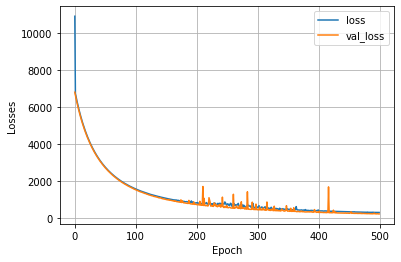

In [130]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
##plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend()
plt.grid(True)

In [131]:
predictions = model.predict(X_test)

In [132]:
from sklearn.metrics import r2_score

print(r2_score(y_test,predictions))

0.978835635059906
